# Projekt 2
Suchen Sie nach Problemlösungsstrategien. Ziel dieses ersten Projekts ist es sich mit Python etwas mehr vertraut zu machen. Sie betrachten dabei Systeme in der Wahrscheinlichkeits- und Fehlerrechnung von Messanalysen. (Notebook 1 - 11)

## Aufgabe 2.1 - Normalverteilung

Nutzen Sie NumPy um 10.000 Zufallszahlen zu generieren welche Gauß/Normalverteilt sind und erstellen Sie ein Histogramm. Modifizieren Sie die Anzahl der ``bins`` um das Gaußprofil schön darzustellen. Plotten Sie eine Gaußfunktion über das Diagramm und passen Sie die Kurve so an, dass Sie das Histogramm approximiert. 







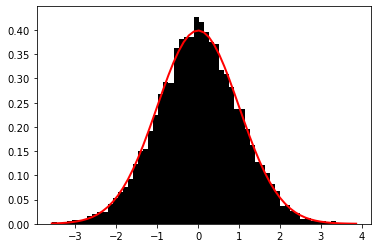

In [2]:
import numpy as np

mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 10000)

#Display the histogram of the samples, along with the probability density function:
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 60, density=True, color = 'black')
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

## Aufgabe 2.2 - Zentraler Grenzwertsatz

Der zentrale Grenzwertsatz der Wahrscheinlichkeitstheorie [central limit theorem](http://en.wikipedia.org/wiki/Central_limit_theorem) besagt, dass das arithmetrische Mittel einer großen Anzahl von unabhängigen Zufallszahlen (unabhängig von der Verteilung) gegen eine Normalverteilung strebt. Zeigen Sie dies mit matplotlib:

1. Erzeugen Sie ein array ``total`` mit 10.000 Nullwerten
2. Erzeugen Sie 10.000 random values uniform von 0 bis 1 verteilt
3. Addieren Sie diese Zahl zum ``total`` array
4. Wiederholen Sie Schritt 2 und 3 zehnmal, dabei Mitteln Sie über die Versuche und erstellen Sie ein Histogramm von jedem Schritt 

[0.5080898686173543, 0.5037267258935236, 0.4902010611499827, 0.5020793012189626, 0.5028305863167457, 0.5114440299789902, 0.5034959130482367, 0.4988161144308836, 0.5006451142936195, 0.50327985167603]


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 432x288 with 0 Axes>

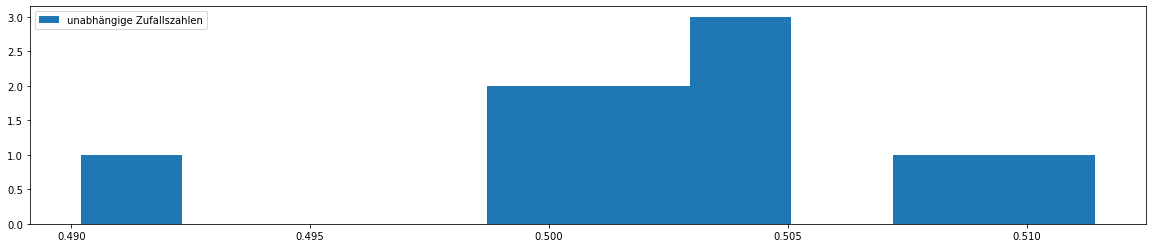

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x= []

total = np.zeros((1, 10000), dtype=int)
for i in range(10):
    randomValues = np.random.uniform(0., 1., 10000)
    randomArray = total + randomValues
    median = np.median(randomArray, axis = 1)
    x.append(median[0])


print(x)
fig = plt.figure()
fig = plt.figure()
fig.set_figwidth(20)
ax = fig.add_subplot(1,1,1)

ax.hist(x, label="unabhängige Zufallszahlen")

plt.legend(loc='upper left')

plt.show

## Aufgabe 2.3 - Monte Carlo Fehlerfortpflanzung - Teil 1

Gemessene Größen wie bspw. gemessene Massen, gemessene Längen unterliegen immer Messunsicherheiten. Wenn diese fehlerbehafteten Daten in eine Systemgleichung eingesetzt werden, pflanzt sich der Fehler fort, d. h. meistens werden sie größer. Das ist Bestandteil der Fehlerrechnung in den Naturwissenschaften.

### Gängige Methode
Die Grundlagen der Fehlerfortpflanzung können Sie hier nachlesen ([Regeln](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas)). 

Beispielsweise haben wir folgendes System: $$F = \frac{G~M_1~M_2}{r^2}$$

Es beschreibt die Gravitationskraft zwischen zwei Körpern $M_1$ und $M_2$ mit dem Abstand $r$. Es liegen folgende Messwerte für $M_1$, $M_2$ und $r$ vor.

* $M_1=40\times10^4\pm0.05\times10^4\rm{kg}$
* $M_2=30\times10^4\pm0.1\times10^4\rm{kg}$
* $r=3.2\pm0.01~\rm{m}$

Die Messunsicherheiten (Messfehler) sind die Standardabweichungen der Gaussverteilung. 

Ferner ist die Gravitationskonstante gegeben: $G = 6.67384\times10^{-11}~\rm{m}^3~\rm{kg}^{-1}~\rm{s}^{-2}$

Nutzen Sie die [Regeln der "standard error propagation"](http://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas) um die resultiereden Gravitationskraft und die Unsicherheiten dieser Kraft zu ermitteln. Hinweis: Rechnen Sie die Gleichung von Hand aus und übertragen Sie diese dann ins Notebook mit eingesetzten Werten.

### Monte Carlo Methode
Nutzen Sie nun **Monte-Carlo** Methode zur Berechnung der Fehlerfortpflanzung. Die Idee hinter der Monte Carlo Methode ist es, alle möglichen Lösungen mittels von Zufallszahlen zu ermitteln und dann das Gesamtergebnis auszuwerten. Man geht wie folgt vor:

* Es werden je 1.000.000 Zufallszahlen gezogen für $M_1$, $M_2$, und $r$, unter berücksichtigung des Mittelwerts (Messwerts) und der Standardabweichung (Messfehler/Messunsicherheit)
* Die Gravitationskraft wird für jedes Set von gezogenen Messwerten ermittelt.

**Auftrag: Führen Sie diese Aufgabe mit ``NumPy arrays`` ohne ``loops`` durch um die 1.000.000 Ergebnisse für die Gravitationskraft zu ermitteln. Erstellen Sie ein normiertes Histogramm der errechneten Werte und überplotten Sie dieses mit der Gaußfunktion.**

Hinweis: Versuchen Sie die ``range`` der x Werte und die Anzahl der ``bins`` so zu wählen, dass man die Verteilungen vergleichen kann. 

In [2]:
# Exercise 2.3 Monte Carlo Fehlerfortpflanzung - Teil 1

In [3]:
import matplotlib.pyplot as plt

import numpy as np

In [4]:
%matplotlib notebook

In [5]:
# Variablen

# Gravitational constant
g = 6.67384e-11

# First Mass
m1 = 40e4

# Second Mass
m2 = 30e4

# Radius
r = 3.2

# Measurement error of the first mass
m1_error = 0.05e4

# Measurement error of the second mass
m2_error = 0.1e4

# Measurement error of the radius
r_error = 0.01

In [6]:
# Gaussche Fehlerfortplanzung

# Solution without the Errors
f = (g*m1*m2)/r**2

# partial derivative of the first Mass

derivation_m1 = (g*m2)/r**2
derivation_m1_error = (derivation_m1*m1_error)**2


# partial derivative of the second Mass
derivation_m2 = (g*m1)/r**2
derivation_m2_error = (derivation_m2*m2_error)**2


# partial derivative of the Raidus
derivation_r = (-2*g*m1*m2)/r**3
derivation_r_error = (derivation_r*r_error)**2

In [7]:
# Error propagation
solution_gauss = np.sqrt(derivation_m1_error + derivation_m2_error + derivation_r_error)

print("Die Gravitationskraft ist: " , round(f, 3) , u'\u00b1' , round(solution_gauss, 3), "N")

Die Gravitationskraft ist:  0.782 ± 0.006 N


In [8]:
# Monte Carlo Methode
# Function for a list of random values in the error limits

# List of random limits for the first mass
list_m1 = np.random.normal(m1, m1_error, 1_000_000)

# List of random limits for the second mass
list_m2 = np.random.normal(m2, m2_error, 1_000_000)

# List of random limits for the radius
list_r = np.random.normal(r, r_error, 1_000_000)

In [9]:
# List of the solutions for the gravitational force
solutions = (g*list_m1*list_m2)/(list_r**2)

<IPython.core.display.Javascript object>


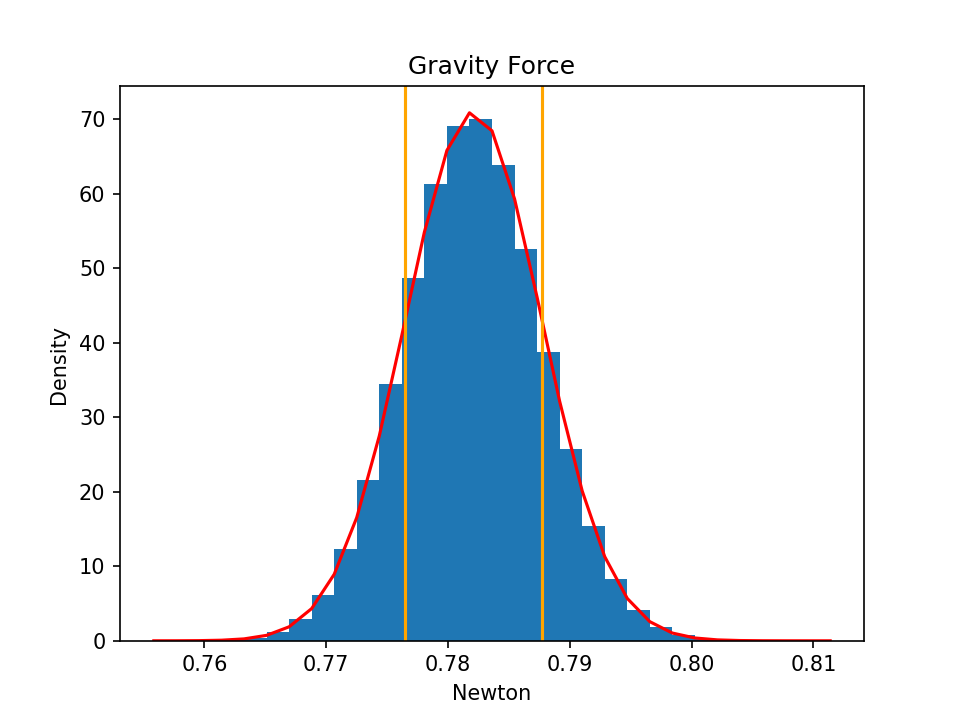

In [10]:
# plot Graph
count, bins, ignored = plt.hist(solutions, 30, density=True)

def gaussian(x, mean, sigma):
    return (1. / (np.sqrt(2 * np.pi* sigma**2) )) * np.exp( -1 *((x - mean)**2 /(2*sigma**2)))


mean, sigma = np.mean(solutions), np.std(solutions, ddof=1)


plt.plot(bins, gaussian(bins, mean, sigma), color='r')
plt.axvline(x=f-solution_gauss, ymin=0, ymax=14, color="orange")
plt.axvline(x=f+solution_gauss, ymin=0, ymax=14, color="orange")


plt.title("Gravity Force")
plt.xlabel("Newton")
plt.ylabel("Density ")
plt.savefig('Exersice2_3.png', dpi=300, bbox_inches='tight')
plt.show()

## Aufgabe 2.4 - Monte Carlo Fehlerfortpflanzung - Teil 2

Wiederholen Sie nun die Aufgabe 2.3 mit den neuen Werten für Massen und Abstand:

$$M_1=40\times10^4\pm2\times10^4\rm{kg}$$
$$M_2=30\times10^4\pm10\times10^4\rm{kg}$$
$$r=3.2\pm1.0~\rm{m}$$


Interpretieren Sie für diese Zahlendaten, welche Methode besser funktioniert. Welche ist genauer? Warum? Worin liegt genau der Vorteil der Monte-Carlo Methode?

In [1]:
# Exercise 2.4 Monte Carlo Fehlerfortpflanzung - Teil 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np

In [3]:
%matplotlib notebook

In [4]:
# Variablen

# Gravitational constant
g = 6.67384e-11

# First Mass
m1 = 40e4

# Second Mass
m2 = 30e4

# Radius
r = 3.2

# Measurement error of the first mass
m1_error = 2e4

# Measurement error of the second mass
m2_error = 10e4

# Measurement error of the radius
r_error = 1

In [5]:
# Gaussche Fehlerfortplanzung

# Solution without the Errors
f = (g*m1*m2)/r**2

# partial derivative of the first Mass
derivation_m1 = (g*m2)/r**2
derivation_m1_error = (derivation_m1*m1_error)**2

# partial derivative of the second Mass
derivation_m2 = (g*m1)/r**2
derivation_m2_error = (derivation_m2*m2_error)**2


# partial derivative of the Radius
derivation_r = (-2*g*m1*m2)/r**3
derivation_r_error = (derivation_r*r_error)**2

In [6]:
# Error propagation
solution_gauss = np.sqrt(derivation_m1_error + derivation_m2_error + derivation_r_error)

print("Die Gravitationskraft ist: " , round(f, 3) , u'\u00b1' , round(solution_gauss, 3), "N")

Die Gravitationskraft ist:  0.782 ± 0.555 N


In [7]:
# Monte Carlo Methode

# Function for a list of random values in the error limits
def random_number(size, value, limit):
    numList = []
    numList=(np.random.normal(value, limit, size))    
    return numList

# List of random limits for the first mass
list_m1 = random_number(1_000_000, m1, m1_error)

# List of random limits for the second mass
list_m2 = random_number(1_000_000, m2, m2_error)

# List of random limits for the radius
list_r = random_number(1_000_000, r, r_error)

In [8]:
# List of the solutions for the gravitational force
solutions = (g*list_m1*list_m2)/(list_r**2)

<IPython.core.display.Javascript object>


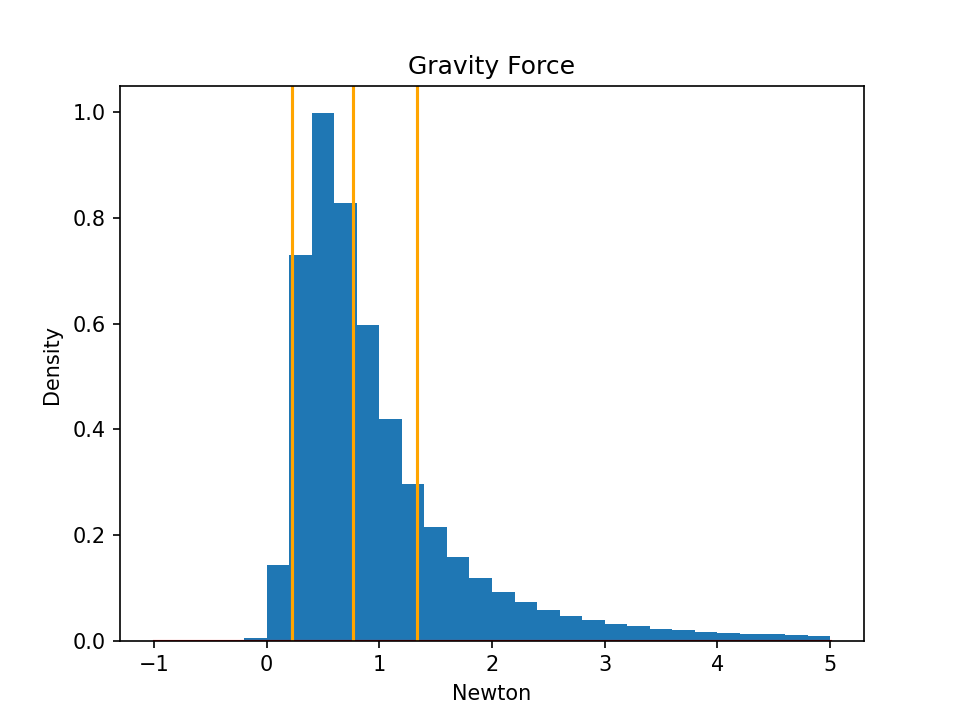

In [9]:
# plot Graph
count, bins, ignored = plt.hist(solutions, 30, range = [-1, 5.], density=True)

def gaussian(x, mean, sigma):
    return (1. / (np.sqrt(2 * np.pi* sigma**2) )) * np.exp( -1 *((x - mean)**2 /(2*sigma**2)) )

mean, sigma = np.median(solutions), np.std(solutions, ddof=1)

plt.plot(bins, gaussian(bins, mean, sigma), color='r')
plt.axvline(x=f-solution_gauss, ymin=0, ymax=14, color="orange")
plt.axvline(x=f+solution_gauss, ymin=0, ymax=14, color="orange")
plt.axvline(x=np.median(solutions), ymin=0, ymax=14, color="orange")
plt.savefig('Exercise2_4.png', dpi=300, bbox_inches='tight')
plt.title("Gravity Force")
plt.xlabel("Newton")
plt.ylabel("Density ")
plt.show()